In [31]:
import matplotlib.pyplot as plt 
import torch 
import numpy as np

from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
#from torchvision.transforms import ToTensor, Lambda

from torch import nn
from torchvision import transforms 

# PyTorch

* Tensors
* Manege, scale and normalize our datasets
* Build a model
* Optimize a model
* Enhance model inference performace

## Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy arrays and ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory address with a capability called <code>bridge-to-np-label</code>, which eliminates the need to copy data. Tensors are also **optimized for automatic differentiation**(we'll see more about that later in the Autograd unit). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!

### Directly from data

In [2]:
# initializing tensors
torch.tensor( [[1,2],[3,4]] )

tensor([[1, 2],
        [3, 4]])

### From a Numpy array

In [3]:
# Tensors can be created from NumPy arrays and vice versa.
#  Since, numpy 'np_array' and tensor 'x_np' share the same 
# memory location here, changing the value for one will change the other.
data = [[1,2],[3,4]]
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

print(f"Numpy np_array value: \n {np_array} \n")
print(f"Tensor x_np value: \n {x_np} \n")

np.multiply(np_array, 2, out=np_array)

print(f"Numpy np_array after * 2 operation: \n {np_array} \n")
print(f"Tensor x_np value after modifying numpy array: \n {x_np} \n")

Numpy np_array value: 
 [[1 2]
 [3 4]] 

Tensor x_np value: 
 tensor([[1, 2],
        [3, 4]]) 

Numpy np_array after * 2 operation: 
 [[2 4]
 [6 8]] 

Tensor x_np value after modifying numpy array: 
 tensor([[2, 4],
        [6, 8]]) 



### From another tensor

In [5]:
# The new tensor retains the properties (shape, data type) 
# of the argument tensor, unless explicitly overridden.
x_data = torch.tensor([[1,2],[3,4]])

x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4965, 0.0070],
        [0.4998, 0.3301]]) 

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4193, 0.5850],
        [0.7818, 0.8751]]) 



### With random or constant values

In [6]:
shape = (2,3)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.3865, 0.6704, 0.1656],
        [0.4116, 0.5536, 0.1901]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Attributes of a tensor

In [7]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Operations on Tensors

Code for processing data samples can get complex and hard to maintain. We typically want our dataset code to be decoupled from our model training code, for better readability and modularity. PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that enable you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of sample pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data. Samples for prototyping and benchmarking your model include:

Image Datasets
Text Datasets
Audio Datasets

In [11]:
# We move our tensor to the GPU if available
if torch.cuda.is_available():
  tensor = tensor.to('cuda')
  print("Work in GPU")
else :
  print("Work in CPU")


Work in CPU


### Standar numpy-like indexing and slicing

In [12]:
tensor = torch.ones(4, 4)
print('First row: ',tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[..., -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


### Joining tensors

In [13]:
# You can use torch.cat to concatenate a sequence of 
#tensors along a given dimension. torch.stack is a related 
#tensor joining option that #concatenates a sequence of 
#tensors along a new dimension.
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


### Arithmetic operations

In [14]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

### Single-element tensors

In [15]:
agg = tensor.sum()
agg_item = agg.item()  
print(agg_item, type(agg_item))

12.0 <class 'float'>


### In-place operations

In [17]:
# Operations that store the result into the operand are called in-place. Use "_"
# n-place operations save some memory, but can be problematic when 
# computing derivatives because of their immediate loss of history. 
# Hence, their use is discouraged.
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]]) 

tensor([[11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.]])


### Tensor to NumPy array

In [18]:
# Since, numpy 'np_array' and tensor 'x_np' share the 
# same memory location here, changing the value for one 
# will change the other.
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### NumPy array to tensor

In [19]:
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Loading and normalizing datasets

Code for processing data samples can get complex and hard to maintain. We typically want our dataset code to be decoupled from our model training code, for better readability and modularity. PyTorch provides two data primitives: <code>torch.utils.data.DataLoader</code> and <code>torch.utils.data.Dataset</code> that enable you to use pre-loaded datasets as well as your own data. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

PyTorch domain libraries provide a number of sample pre-loaded datasets (such as FashionMNIST) that subclass torch.utils.data.Dataset and implement functions specific to the particular data. Samples for prototyping and benchmarking your model include:
* Image Datasets
* Text Datasets
* Audio Datasets

### Loading a dataset

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### Preparing your data for training with DataLoaders

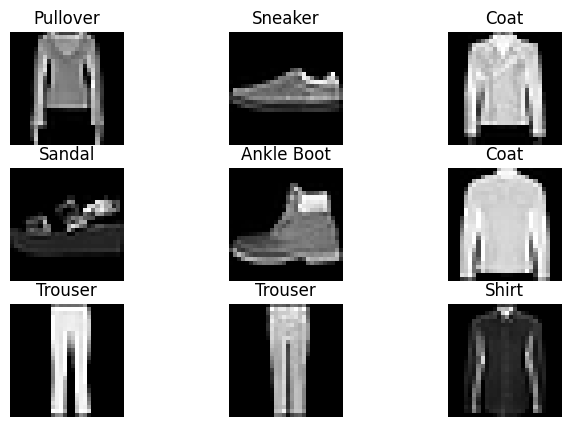

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 5))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [7]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [9]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


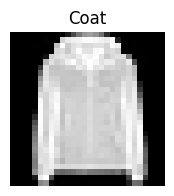

In [28]:
img = train_features[0].squeeze()
label = train_labels[0]
plt.figure(figsize=(5,2))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.title(list(labels_map.values())[label])
plt.show()

### Normalization

Normalization is a common data pre-processing technique that is applied to scale or transform the data to make sure there's an equal learning contribution from each feature. For example, each pixel in the grayscale images have a value between 0 and 255, which are features. If one pixel value is 17 and another pixel is 197. There will be an uneven distribution of the pixel importance, because the higher pixel volumes will deviate the learning. Normalization changes the range of your data, without distorting its distinction among our features. This pre-processing is done to avoid:
* A reduction of the prediction accuracy
* Difficulty for the model to learn
* Unfavorable distribution of the feature data ranges

In [29]:
ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [30]:
target_transform = Lambda(lambda y: torch.zeros(
    10, dtype=torch.float).scatter_(dim=0, index=torch.tensor(y), value=1))

## Building the model layers

A neural network is a collection of neurons that are connected by layers. Each neuron is a small computing unit that performs simple calculations to collectively solve a problem. Neurons are organized in 3 types of layers: input layer, hidden layer, and output layer. The hidden and output layers contain a number of neurons. Neural networks mimic the way a human brain processes information.

Components:
* Activation function
* Weights
* Bias

### Define the class

In [32]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("using {} device".format(device))

using cpu device


In [34]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.ReLU()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [35]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
)


In [39]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4])


### Model layers

The nn.Linear module randomly initializes the weights and bias for each layer and internally stores the values in Tensors.

In [41]:
#print(f"First Linear weights: {model.linear_relu_stack[0].weight} \n")
#print(f"First Linear biases: {model.linear_relu_stack[0].bias} \n")

In [42]:
input_image = torch.rand(3,28,28)
print(input_image.size())

# Flatten
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

# Linear
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

# ReLU
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

torch.Size([3, 28, 28])
torch.Size([3, 784])
torch.Size([3, 20])
Before ReLU: tensor([[-0.0431, -0.0222,  0.0924, -0.2502,  0.2257,  0.4530, -0.2952, -0.2699,
         -0.2711,  0.1961,  0.1972,  0.7181,  0.1231,  0.2480,  0.9738,  0.1781,
         -0.3109, -0.3283, -0.3424, -0.2506],
        [-0.3640, -0.2059,  0.0984, -0.0393,  0.4140,  0.6013,  0.1620, -0.7382,
          0.0126,  0.0517, -0.1036,  0.8402,  0.1494,  0.3347,  0.7138,  0.4903,
         -0.0972, -0.3165, -0.1721, -0.2911],
        [-0.5803, -0.4153, -0.0627, -0.3340,  0.2775,  0.6228, -0.1419, -0.5910,
         -0.1302, -0.1002,  0.0831,  0.8780, -0.1504,  0.2916,  0.7268,  0.0301,
         -0.4626, -0.5813, -0.2967,  0.0568]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.0924, 0.0000, 0.2257, 0.4530, 0.0000, 0.0000, 0.0000,
         0.1961, 0.1972, 0.7181, 0.1231, 0.2480, 0.9738, 0.1781, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0000, 0.0000, 0.0984, 0.0000, 0.4140, 0.6013, 0.1620, 0.00

In [43]:
# Sequential
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

# Softmax
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### Model parameters

In [45]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters(): # parameters()
    print(f"Layer: {name} | Size: {param.size()}\n")#| Values : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): ReLU()
  )
) 


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784])

Layer: linear_relu_stack.0.bias | Size: torch.Size([512])

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512])

Layer: linear_relu_stack.2.bias | Size: torch.Size([512])

Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512])

Layer: linear_relu_stack.4.bias | Size: torch.Size([10])



## Automatic differentiation

## Optimization loop

## Load and run model predictions

## Full model building process